In [37]:
### Load PPS model
%run ./HC_model_new.ipynb

In [61]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from sklearn import preprocessing  

In [107]:
### Visuotactile experiment simulation setup 

# Distance points in cm (network coordinates) 
s_distances = np.asarray([2700,2200,1500,800,300])/1000
ts = np.linspace(s_distances[0],s_distances[-1],5)
v = 30 #cm/s 
mydistances = (120 - ts*v) # distance points in cm (network coordinates)

## Simulation setup
simtime = 100 #ms 

## Synapses setup
L_ex,L_in,S_ex,S_in = 0.15,0.05,1,4
b = 2.5
pr = 0

In [48]:
RTs,ZMs,ZTs,ZAs = experimentrun(mydistances,simtime,b,pr,L_ex,L_in,S_ex,S_in)

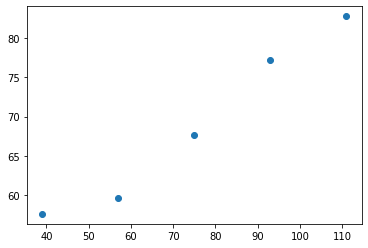

In [49]:
plt.figure(1)
plt.scatter(mydistances,RTs)
#plt.imshow(ZTs[:,:,4])

In [57]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
np.load = lambda *a,**k: np_load_old(*a,allow_pickle=True)

In [99]:
def RTsig(data,cp,h,ymin,ymax):
    return (ymin+ymax*np.exp((data-cp)/h)) / (1+np.exp((data-cp)/h))

## Sigmoid function fitting
def sigfit(x,y):
    ymin = np.min(y)
    ymax = np.max(y)
    
    k_0 = (ymax - ymin)/(x[-1]-x[0])
    initial_slope = (ymax - ymin)/(4*k_0)
    middle_x = np.max(x)/2
    init_guess = [middle_x, initial_slope]
    boundaries = ([0,float('-inf')],[float('inf'),float('inf')])
    
    popt, pcov = curve_fit(lambda data,cp,h:RTsig(data,cp,h,ymin,ymax),x,y,p0=init_guess,method='trf',ftol=1e-8,xtol=1e-8,maxfev=10000,bounds=boundaries)
    sigpar = np.asarray(popt)
    dc = sigpar[0]
    h = sigpar[1]
    
    return dc,h

In [109]:
# Experimental Data - SCZ
ymin = 345.10584283635757
ymax = 449.60233625307154
cp = 120-1.654*v
slope = 1/0.23
SCZ_RTs = RTsig(mydistances,cp,slope,ymin,ymax)

In [116]:
def f(L_ex=0.15, rho=0,B=2.5):
    plt.figure(2)
    RTs,ZMs,ZTs,ZAs = experimentrun(mydistances,simtime,B,rho,L_ex,L_in,S_ex,S_in)
    dc,h = sigfit(mydistances,RTs)
    a_distances_exp = np.linspace(mydistances[0],mydistances[-1],30)
    scaledRTs = preprocessing.normalize(RTs.reshape(1,-1))[0]
    yf_exp = RTsig(a_distances_exp,dc,h,np.min(scaledRTs),np.max(scaledRTs))
    
    plt.plot(a_distances_exp,yf_exp,label='Model')
    plt.scatter(mydistances,preprocessing.normalize(SCZ_RTs.reshape(1,-1))[0],label='SCZ')
    plt.ylabel('Scaled RT',size=14)
    plt.xlabel('Distance (cm)',size=14)
    plt.legend()
    plt.show()

interactive_plot = interactive(f, L_ex=(0, 2.5), rho=(0, 6.5), B=(0.5,6))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

# Export to html and try in website.

interactive(children=(FloatSlider(value=0.15, description='L_ex', max=2.5), FloatSlider(value=0.0, description…

In [ ]:
# Do widget for two-point discrimination with mexican hat parameters to show the requirement of an E/I balance.

In [ ]:
# Explore two hand discrimination